In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns

In [3]:
sns.set_context('notebook')
sns.set_style('ticks')
sns.set_palette('colorblind')

This dictionary contains some parameter values from Simbad/VizieR for Aldebaran.  See http://simbad.u-strasbg.fr/simbad/sim-id?Ident=aldebaran&NbIdent=1&Radius=2&Radius.unit=arcmin&submit=submit+id.

The format is a two-level dict:

* Level 1 contains the name of the parameter (`J`, `H`, `mass`, ...)
* Level 2 gives a dict or a list of dicts with at least the entries `value`, `uncert`, `provenance`.

In [4]:
params = {'J': {'value': -2.095,
                'uncert': 0.194,
                'provenance': "http://vizier.u-strasbg.fr/viz-bin/VizieR-S?2MASS%20J04355524%2b1630331 2MASS",
                'unit': 'mag'},
          'H': {'value': -2.775,
                'uncert': 0.170,
                'provenance': "http://vizier.u-strasbg.fr/viz-bin/VizieR-S?2MASS%20J04355524%2b1630331 2MASS",
                'unit': 'mag'},
          'K': {'value': -3.044,
                'uncert': 0.140,
                'provenance': "http://vizier.u-strasbg.fr/viz-bin/VizieR-S?2MASS%20J04355524%2b1630331 2MASS",
                'unit': 'mag'},
          'Teff,logg,Fe_H' : [{'value': (3900,1.3,0.17),
                               'uncert': (50, 0.2, 0.1),
                               'provenance': "http://simbad.u-strasbg.fr/simbad/sim-ref?bibcode=2012ApJ...761..161S",
                               'unit': '(K, log_10(m/s^2), dex)'},
                              {'value': (3900,1.3,0.05),
                               'uncert': (50, 0.2, 0.1),
                               'provenance': "http://simbad.u-strasbg.fr/simbad/sim-ref?bibcode=2012ApJ...761..161S",
                               'unit': '(K, log_10(m/s^2), dex)'},
                              {'value': (3870,1.66,-0.04),
                               'uncert': (50, 0.2, 0.1),
                               'provenance': "http://simbad.u-strasbg.fr/simbad/sim-ref?bibcode=2011A%26A...531A.165P",
                               'unit': '(K, log_10(m/s^2), dex)'},
                              {'value': (3936,1.0,-0.34),
                               'uncert': (50, 0.2, 0.1),
                               'provenance': "http://simbad.u-strasbg.fr/simbad/sim-ref?bibcode=2008AJ....135..209M",
                               'unit': '(K, log_10(m/s^2), dex)'},
                              {'value': (3850,0.55,-0.10),
                               'uncert': (50, 0.2, 0.1),
                               'provenance': "http://simbad.u-strasbg.fr/simbad/sim-ref?bibcode=2009A%26A...508.1313F",
                               'unit': '(K, log_10(m/s^2), dex)'}],
         'parallax': {'value': 0.04894,
                      'uncert': 0.00017,
                      'provenance': "http://simbad.u-strasbg.fr/simbad/sim-ref?bibcode=2007A%26A...474..653V",
                      'unit': 'arcsec'},
         'nu_max': {'value': 2.23,
                    'uncert': 0.10,
                    'provenance': 'us',
                    'unit': 'muHz'}
         }

In [5]:
Fe_Hs = [p['value'][2] for p in params['Teff,logg,Fe_H']]
names = ['Fe_H = {:.2f}'.format(f) for f in Fe_Hs]
names

['Fe_H = 0.17', 'Fe_H = 0.05', 'Fe_H = -0.04', 'Fe_H = -0.34', 'Fe_H = -0.10']

Here we look at the Param values of $\nu_\mathrm{max}$, compared to our measurement; this is a posterior predictive check on the Param fits.

/Users/farr/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


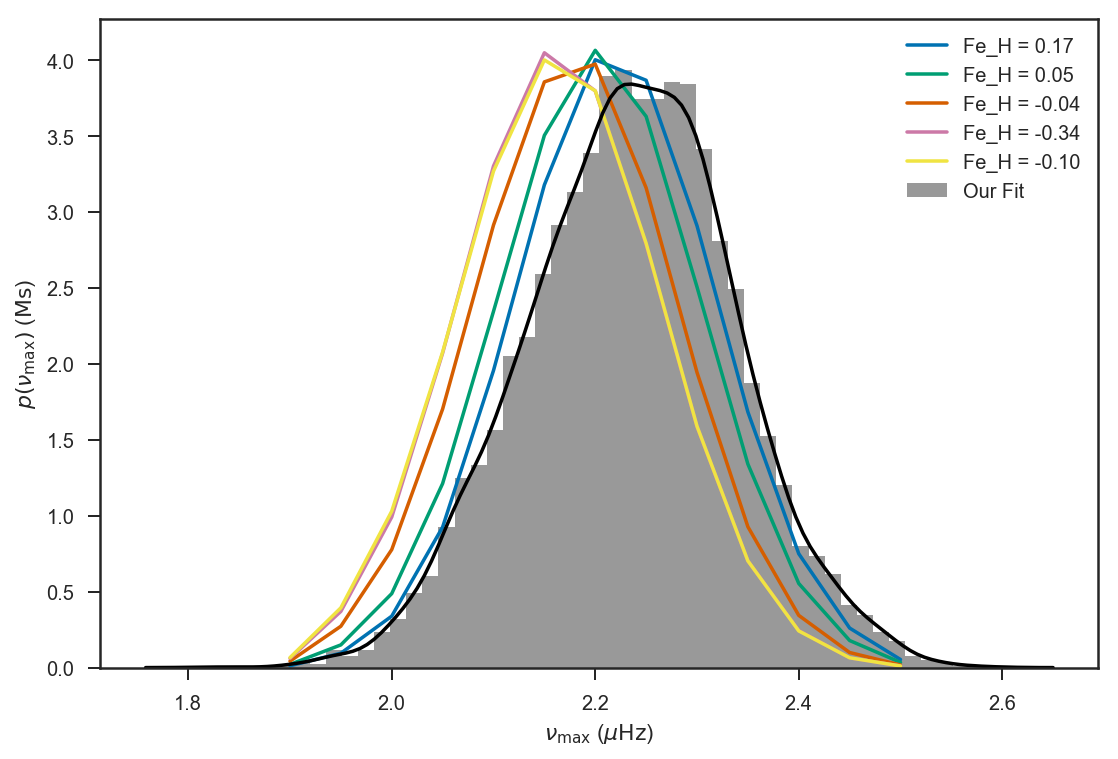

In [8]:
for i in range(1,6):
    f='../PARAM_Results/RGB_prior_numax_teff_feh_lum/pdfs/PDFnumax/pdf_numax_Aldeb{:d}'.format(i)
    post = genfromtxt(f, names=True)
    pdf = post['PDF'] / trapz(post['PDF'], post['numax'])
    plot(post['numax'], pdf, label=names[i-1])
our_numax = genfromtxt('../fits/all/nu_max-5-4.dat')
sns.distplot(our_numax, color='k', label='Our Fit')
legend(loc='best')
xlabel(r'$\nu_\mathrm{max}$ ($\mu \mathrm{Hz}$)')
ylabel(r'$p\left( \nu_\mathrm{max} \right)$ ($\mathrm{Ms}$)')
tight_layout()
savefig('../plots/param_numax.pdf')

So, let's look at the masses we infer (errorbar is from [Tsuji (2008)](https://doi.org/10.1051/0004-6361:200809869)):

Fe_H = 0.17 mass = 1.41 +/- 0.19
Fe_H = 0.05 mass = 1.34 +/- 0.18
Fe_H = -0.04 mass = 1.34 +/- 0.18
Fe_H = -0.34 mass = 1.09 +/- 0.13
Fe_H = -0.10 mass = 1.34 +/- 0.18


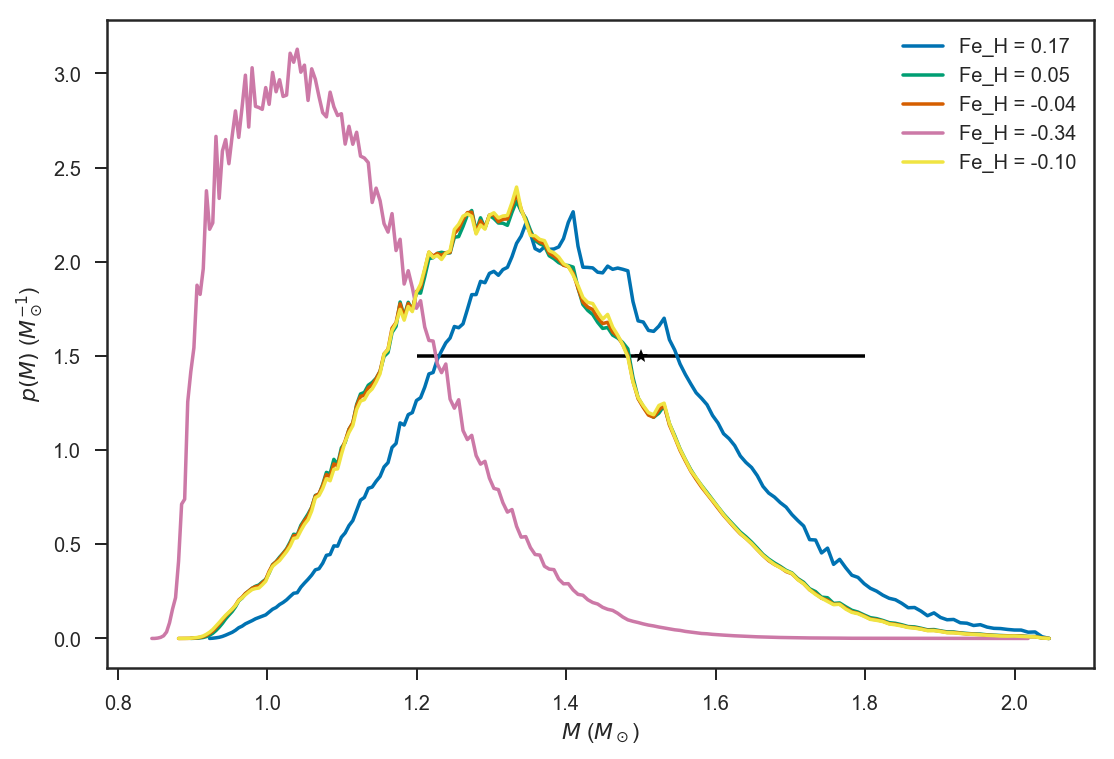

In [17]:
mmus = []
msigmas = []
for i in range(1,6):
    f='../PARAM_Results/RGB_prior_numax_teff_feh_lum/pdfs/PDFm/pdf_m_Aldeb{:d}'.format(i)
    post = genfromtxt(f, names=True)
    pdf = post['PDF'] / trapz(post['PDF'], post['mMs'])
    
    mmus.append(trapz(post['mMs']*pdf, post['mMs']))
    msigmas.append(sqrt(trapz((post['mMs']-mmus[-1])**2*pdf, post['mMs'])))
    
    plot(post['mMs'], pdf, label=names[i-1])
    
errorbar([1.5], [1.5], xerr=[0.3], yerr=[0.0], fmt="*", color='k')
    
legend(loc='best')
xlabel(r'$M$ ($M_\odot$)')
ylabel(r'$p\left( M \right)$ ($M_\odot^{-1}$)')
tight_layout()
savefig('../plots/param_mass.pdf')

for n, m, s in zip(names, mmus, msigmas):
    print('{:s} mass = {:.2f} +/- {:.2f}'.format(n,m,s))

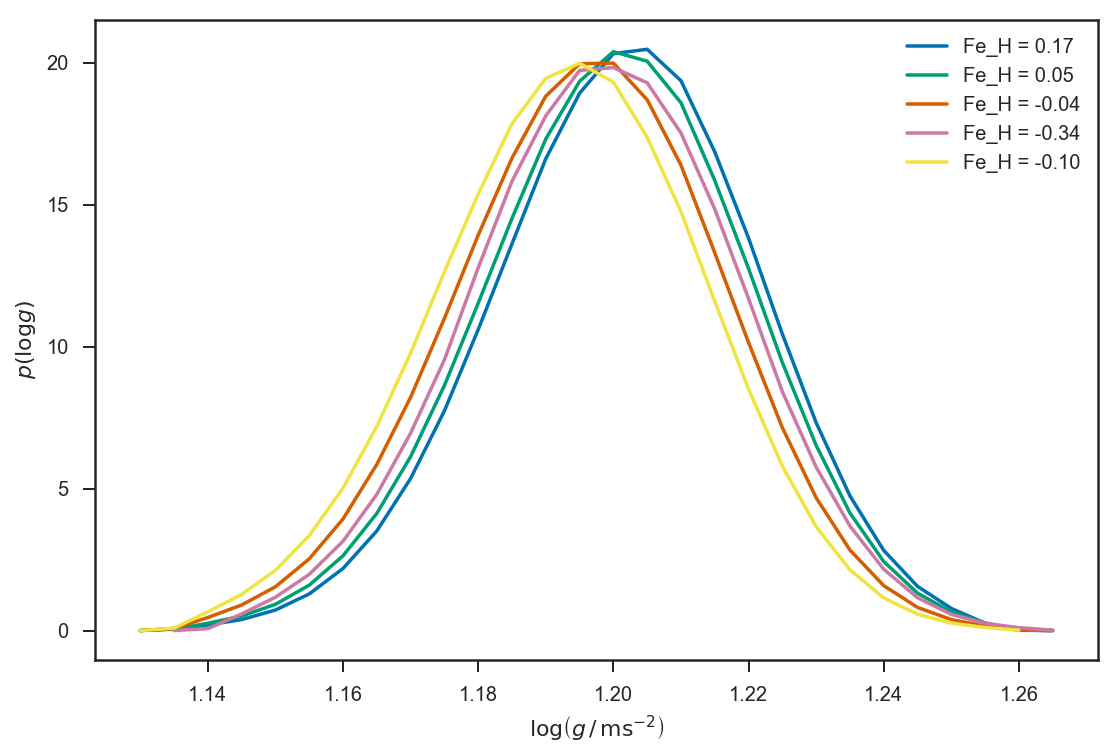

In [19]:
for i in range(1,6):
    f='../PARAM_Results/RGB_prior_numax_teff_feh_lum/pdfs/PDFlogg/pdf_logg_Aldeb{:d}'.format(i)
    post = genfromtxt(f, names=True)
    pdf = post['PDF'] / trapz(post['PDF'], post['logg'])
    plot(post['logg'], pdf, label=names[i-1])
legend(loc='best')
xlabel(r'$\log \left(g \, / \, \mathrm{m} \mathrm{s}^{-2}\right)$')
ylabel(r'$p\left( \log g \right)$')
tight_layout()
savefig('../plots/param_logg.pdf')

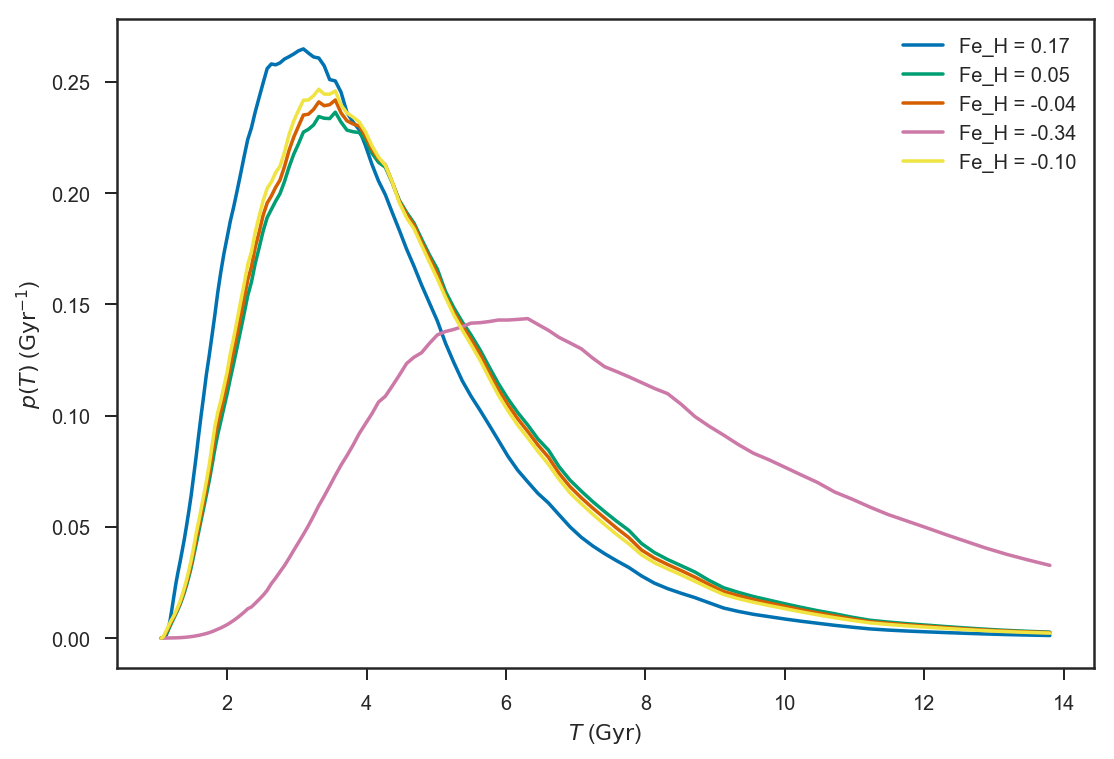

In [20]:
for i in range(1,6):
    f='../PARAM_Results/RGB_prior_numax_teff_feh_lum/pdfs/PDFage/pdf_age_Aldeb{:d}'.format(i)
    post = genfromtxt(f, names=True)
    pdf = post['PDF'] / trapz(post['PDF'], post['ageGyr'])
    plot(post['ageGyr'], pdf, label=names[i-1])
legend(loc='best')
xlabel(r'$T$ ($\mathrm{Gyr}$)')
ylabel(r'$p\left( T \right)$ ($\mathrm{Gyr}^{-1}$)')
tight_layout()
savefig('../plots/param_age.pdf')